# EDA and Data Cleaning of Marvel Characters' Data

Importing necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Loading the Dataset

In [9]:
df = pd.read_csv('marvelscraping/characters.csv')

In [10]:
df.head()

,Name,Gender,Marital_Status,Height,Weight,Eye_Color,Hair_Color,Living_Status,Reality,Birthplace,Identity,Citizenship,First_Appearance,Appearances
0,6-Ball (Earth-616),Male,Single,NaN,NaN,NaN,NaN,Alive,Earth-616,NaN,Secret,American,"July, 1991",1.0
1,6R (Earth-616),Agender,NaN,NaN,NaN,NaN,NaN,Deceased,Earth-616,Sentinel Headquarters,NaN,NaN,"July, 1969",1.0
2,762 (Legion Personality) (Earth-616),Male,Single,NaN,NaN,NaN,Black,Alive,Earth-616,NaN,Secret,NaN,"June, 2010",1.0
3,627 (Skullbot) (Earth-12041),Agender,NaN,NaN,NaN,Blue,No Hair At All,Deceased,Earth-12041,NaN,Public,NaN,"June 27, 2017",1.0
4,749 (Legion Personality) (Earth-616),Male,Single,NaN,NaN,NaN,Black,Alive,Earth-616,Legion,Secret,NaN,"June, 2011",1.0


In [11]:
df.shape

(74350, 14)

We look at the data types of each column. From this, we see that only the height, weight, and the number of appearances are numerical, with the rest being categorical.

In [12]:
df.dtypes

Name                 object
Gender               object
Marital_Status       object
Height              float64
Weight              float64
Eye_Color            object
Hair_Color           object
Living_Status        object
Reality              object
Birthplace           object
Identity             object
Citizenship          object
First_Appearance     object
Appearances         float64
dtype: object

We then proceed with clearning each of the categorical columns, starting with Gender. In particular, we look at all the unique values for each categorical column and fix misspellings, inconsistent capitalizations, etc.

In [13]:
df['Gender'].unique()

array(['Male', 'Agender', 'Female', nan, 'Non-Binary', 'Genderfluid',
       'Male/Female', 'Gestalt', 'female', 'Single', 'Transgender'],
      dtype=object)

In [14]:
df['Gender'].replace({'female' : 'Female', 'Male/Female' : np.nan, 'Single' : np.nan, 'Gestalt' : np.nan}, inplace = True)
df['Gender'].unique()

array(['Male', 'Agender', 'Female', nan, 'Non-Binary', 'Genderfluid',
       'Transgender'], dtype=object)

We do the same for Marital_Status.

In [15]:
df['Marital_Status'].unique()

array(['Single', nan, 'Married', 'Widowed', 'Separated', 'Engaged',
       'Divorced', 'Estranged', 'Windowed', 'single', 'Unknown.', 'Blond',
       'Unnamed', 'Divorces', 'Unknown',
       'Married\x7f\'"`UNIQ--ref-00000009-QINU`"\'\x7f'], dtype=object)

In [16]:
df['Marital_Status'].replace({'Windowed' : 'Widowed', 'single' : 'Single', 'Unknown.' : np.nan,
                            'Blond' : np.nan, 'Unnamed' : np.nan, 
                            'Divorces' : 'Divorced', 'Unknown' : np.nan, 
                            'Married\x7f\'"`UNIQ--ref-00000009-QINU`"\'\x7f' : 'Married'},
                    inplace = True)
df['Marital_Status'].unique()

array(['Single', nan, 'Married', 'Widowed', 'Separated', 'Engaged',
       'Divorced', 'Estranged'], dtype=object)

We proceed with Eye_Color. To make this process easier, we first fix the capitalization inconsistencies before doing a replace operation.

In [17]:
df['Eye_Color'].unique()

array([nan, 'Blue', 'Red', 'Yellow', 'Brown', 'No Eyes At All', 'Grey',
       'White', 'Black', 'Hazel', 'Green', 'Gold', 'Purple', 'Pink',
       'Orange', 'Variable', 'Dark', 'Amber', 'Fair', 'Violet', 'Silver',
       'black', 'no visible pupils', 'Magenta', 'Compound', 'No Visible',
       'Brown-Grey', 'blue', 'yellow', 'brown',
       'no visible pupil or iris', 'red', 'No Iris', 'white',
       'No visible Irises or Pupils', 'hazel'], dtype=object)

In [18]:
df['Eye_Color'] = df['Eye_Color'].apply(lambda x : str(x).capitalize())
df['Eye_Color'].unique()

array(['Nan', 'Blue', 'Red', 'Yellow', 'Brown', 'No eyes at all', 'Grey',
       'White', 'Black', 'Hazel', 'Green', 'Gold', 'Purple', 'Pink',
       'Orange', 'Variable', 'Dark', 'Amber', 'Fair', 'Violet', 'Silver',
       'No visible pupils', 'Magenta', 'Compound', 'No visible',
       'Brown-grey', 'No visible pupil or iris', 'No iris',
       'No visible irises or pupils'], dtype=object)

In [19]:
df['Eye_Color'].replace({'Nan' : np.nan, 'Fair' : np.nan, 'Dark' : np.nan, 
                        'No visible pupils' : 'No visible iris and/or pupils',
                        'No visible' : 'No visible iris and/or pupils',
                        'No visible pupil or iris' : 'No visible iris and/or pupils',
                        'No iris' : 'No visible iris and/or pupils',
                        'No visible irises or pupils' : 'No visible iris and/or pupils'},
                        inplace = True)
df['Eye_Color'].unique()

array([nan, 'Blue', 'Red', 'Yellow', 'Brown', 'No eyes at all', 'Grey',
       'White', 'Black', 'Hazel', 'Green', 'Gold', 'Purple', 'Pink',
       'Orange', 'Variable', 'Amber', 'Violet', 'Silver',
       'No visible iris and/or pupils', 'Magenta', 'Compound',
       'Brown-grey'], dtype=object)

We do the same for Hair_Color.

In [20]:
df['Hair_Color'].unique()

array([nan, 'Black', 'No Hair At All', 'Blond', 'Bald', 'Grey', 'Brown',
       'White', '[1]', 'Red', 'Pink', 'Green', 'Auburn', 'Gold', 'Purple',
       'Blue', 'Strawberry Blond', 'Silver', 'Orange', 'Dyed', 'Variable',
       'Yellow', 'Shaved', 'Light Brown', 'green', 'Magenta', '[3]',
       'red', 'Platinum Blond', '[2]', 'bald', 'Hepzibah', 'black',
       'grey', 'brown', '[22]', '[37]', '[4]', '[11]', 'white', 'blue',
       '[9]', 'green hair', 'Orange-brown', 'dyed', 'pink', 'shaved'],
      dtype=object)

In [21]:
df['Hair_Color'] = df['Hair_Color'].apply(lambda x : str(x).capitalize())
df['Hair_Color'].unique()

array(['Nan', 'Black', 'No hair at all', 'Blond', 'Bald', 'Grey', 'Brown',
       'White', '[1]', 'Red', 'Pink', 'Green', 'Auburn', 'Gold', 'Purple',
       'Blue', 'Strawberry blond', 'Silver', 'Orange', 'Dyed', 'Variable',
       'Yellow', 'Shaved', 'Light brown', 'Magenta', '[3]',
       'Platinum blond', '[2]', 'Hepzibah', '[22]', '[37]', '[4]', '[11]',
       '[9]', 'Green hair', 'Orange-brown'], dtype=object)

In [22]:
df['Hair_Color'].replace({'Nan' : np.nan, '[1]' : np.nan, '[3]' : np.nan, '[2]' : np.nan, 'Hepzibah' : np.nan, 
                        '[22]' : np.nan, '[37]' : np.nan, '[4]' : np.nan, '[11]' : np.nan, '[9]' : np.nan,
                        'Green hair' : 'Green'},
                        inplace = True)
df['Hair_Color'].unique()

array([nan, 'Black', 'No hair at all', 'Blond', 'Bald', 'Grey', 'Brown',
       'White', 'Red', 'Pink', 'Green', 'Auburn', 'Gold', 'Purple',
       'Blue', 'Strawberry blond', 'Silver', 'Orange', 'Dyed', 'Variable',
       'Yellow', 'Shaved', 'Light brown', 'Magenta', 'Platinum blond',
       'Orange-brown'], dtype=object)

Upon looking at Living_Status, we see that all of its entries are spelled properly and is already clean, so we leave it as is.

In [63]:
df['Living_Status'].unique()

array(['Alive', 'Deceased', nan], dtype=object)

We now proceed to Reality. As expected, majority of its entries are prefixed with "Earth-", as this is the usual way of specifying the different realities in the Marvel Multiverse. 

In [23]:
df['Reality'].unique()

array(['Earth-616', 'Earth-12041', 'Earth-12772', ..., 'Earth-89947',
       'Earth-14114', 'Earth-97449'], dtype=object)

We consider all entries in this column that does not have a prefix of "Earth-". Upon searching these online, I realized that most of these realities are outside the Marvel Multiverse, and so they don't follow the convention earlier. We simply replace "Unknown Reality" with a null value, since the rest are already formatted cleanly.

In [24]:
[reality for reality in list(df['Reality'].unique()) if str(reality)[:6] != 'Earth-']

['Multiverse',
 'Ideaverse',
 'Unknown Reality',
 'Otherworld',
 nan,
 'Land of Cancelled Heroes',
 'Mojoverse',
 'Omniverse',
 'Styrakos',
 'First Cosmos',
 'Brilliant City',
 'Utopian Parallel',
 'Elsewhen']

In [25]:
df['Reality'].replace({'Unknown Reality' : np.nan}, inplace = True)
[reality for reality in list(df['Reality'].unique()) if str(reality)[:6] != 'Earth-']

['Multiverse',
 'Ideaverse',
 nan,
 'Otherworld',
 'Land of Cancelled Heroes',
 'Mojoverse',
 'Omniverse',
 'Styrakos',
 'First Cosmos',
 'Brilliant City',
 'Utopian Parallel',
 'Elsewhen']

We now proceed with Identity. We do the same process as the ones we had earlier.

In [26]:
df['Identity'].unique()

array(['Secret', nan, 'Public', 'No Dual', 'Known to Authorities',
       'No  Dual', 'Human', '[1]'], dtype=object)

In [27]:
df['Identity'].replace({'No Dual' : 'No Dual Identity', 'No  Dual' : 'No Dual Identity', 'Human' : np.nan, '[1]' : np.nan},
                        inplace = True)
df['Identity'].unique()

array(['Secret', nan, 'Public', 'No Dual Identity',
       'Known to Authorities'], dtype=object)

We now proceed with First_Appearance.

In [28]:
df['First_Appearance'].unique()

array(['July, 1991', 'July, 1969', 'June, 2010', ..., 'Damballah',
       'July 22, 2018', 'April 15, 2017'], dtype=object)

In [29]:
df['First_Appearance'].nunique()

2167

Since this column has a lot of unique values, we try to strip it first, to see if this will reduce the number of unique values. However, this did not work.

In [76]:
df['First_Appearance'] = df['First_Appearance'].apply(lambda x : str(x).strip())
df['First_Appearance'].replace({'nan' : np.nan}, inplace = True)
df['First_Appearance'].nunique()

2167

As we have seen above, some entries have complete dates for their first appearance, while some only have a month and year. The cell below attempts to see whether there are entries with only year values. This happens to be the case, and so we consider only the year of the first_appearance for consistency.

In [30]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months.extend([f'{month},' for month in months])
[date for date in list(df['First_Appearance'].unique()) if str(date).split()[0] not in months]

[nan,
 'The Huntsman',
 ' S2E04',
 ' S1E08',
 'Yazatas',
 ' S1E13',
 ' S2E01',
 '2000',
 'Black Widow: Forever Red',
 'Amalgam Comics (Trading Cards)',
 '2001',
 'Ronin',
 'Monolith',
 'Khonshu',
 'Unknown',
 ' S1E12',
 '1977',
 '1984',
 ' S1E05',
 'Shuma-Gorath',
 ' S1E03',
 '1980',
 'Iron Man',
 'The Bent Bullet Report',
 ' S2E03',
 'Army of Darkness: Ashes 2 Ashes #1',
 'Demogorge',
 'Inhumans',
 ' S1E04',
 ' S1E21',
 'Totem',
 '2010',
 '1967',
 ' S2E09',
 'Spider-Man',
 '1993',
 'Age of X Communiques: Berserker, Hellion, Nightmare',
 ' S2E02',
 ' S1E19',
 'Wolverine: Weapon X Vol 1 12',
 '2009',
 '2008',
 '2015',
 ' S2E15',
 'Odin',
 ' S2E16',
 '2014',
 ' S3E12',
 ' S1E25',
 'Breaker-Apart',
 '2003',
 ' S1E02',
 'Loki',
 ' S2E14',
 'Poisons',
 '1988',
 ' S1E11',
 ' #5',
 ' S2E06',
 'Liberty Scouts Comics #2',
 '2005',
 'Apollo',
 'Cormac of Connacht',
 'Spider-Man: Arachnophobia',
 '2002',
 ' S2E08',
 ' S1E06',
 ' S2E18',
 'Horus',
 '2007',
 'Age of X Communiques: Frenzy, Magma, Cy

The function below extracts the year from the First_Appearance entry. Since Marvel started in the 20th century, no character should appear before 1900.

In [31]:
def extract_year(entry):
    try:
        year = int(entry.split()[-1])
        if year >= 1900:
            return year 
        else:
            return np.nan
    except:
        return np.nan

We check if the function works as expected.

In [32]:
extract_year('2000'), extract_year('July, 1991'), extract_year('July 22, 2018'), extract_year(np.nan), extract_year('(Vol. 2) #2')

(2000, 1991, 2018, nan, nan)

We then apply this function and create a new column: Year_Introduced.

In [33]:
df['Year_Introduced'] = df['First_Appearance'].apply(extract_year)
df['Year_Introduced'].unique()

array([1991., 1969., 2010., 2017., 2011., 2015., 1997., 1993., 1994.,
       2019., 1995., 1999., 2013.,   nan, 1984., 1977., 2020., 1953.,
       1980., 1989., 2003., 2006., 2008., 2018., 2014., 2012., 2007.,
       1967., 1965., 1992., 2005., 2004., 2001., 1974., 1987., 1996.,
       1985., 1972., 2009., 1990., 1955., 1982., 1976., 2000., 1986.,
       1968., 2021., 1988., 1940., 1998., 1978., 1947., 1945., 1975.,
       1983., 1964., 1943., 1941., 2016., 1981., 1970., 1962., 2002.,
       1944., 1942., 1979., 1954., 1973., 1963., 1948., 1961., 1966.,
       1971., 1952., 1960., 1957., 1946., 1939., 1950., 1958., 1956.,
       1959., 1951., 1949., 1936.])

We then drop First_Appearance since we don't need it anymore.

In [34]:
df = df.drop('First_Appearance', axis = 1)
df.shape

(74350, 14)

We now proceed with Birthplace.

In [35]:
df['Birthplace'].unique()

array([nan, 'Sentinel Headquarters', 'Legion', ..., 'Ghudaza', 'Sumeria',
       'Meroê'], dtype=object)

In [36]:
df['Birthplace'].nunique()

1246

In [37]:
df['Birthplace'] = df['Birthplace'].apply(lambda x : str(x).strip())
df['Birthplace'].replace({'nan' : np.nan}, inplace = True)
df['Birthplace'].nunique()

1246

As seen above, the Birthplace feature has a lot of unique values, and stripping these values did not result to them being reduced. Due to this, later on in the model-building process, we try a configuration that does not involve this feature, as it was not fully cleaned. The same observation and process will be done for the Citizenship feature, as seen below.

In [38]:
df['Citizenship'].unique()

array(['American', nan, 'Chronicoms', 'Turanian', 'Afghan',
       'Saudi Arabian', 'Belgian', 'British', 'Dutch', 'Polish', 'German',
       'Canadian', 'Canada', 'Latverian', 'Atlantean', 'Scottish',
       'English', 'Krakoan', 'South African', 'Wakandan', 'Egyptian',
       'Azerbaijani', 'Zamoran', 'Aqiria', 'Saudi Arabia', 'Indian',
       'Aakon', 'Vietnamese', 'Austrian', 'Japanese', 'Xandarian',
       'New Canaanite', 'Ethiopia', 'Tanzanian', 'African', 'Germany',
       'Alfheim', 'Kymellian', 'Spanish', 'Undying', 'Kree Empire',
       'Mycenaean', 'Greek', 'Symbiotes', 'Attilan', 'Australian',
       'French', 'Asgardian', 'Vanaheim', 'Jotunheim', 'Irish',
       "Shi'ar Empire", 'Nemedian', 'Skrull Empire', 'Italian', 'Polaria',
       'Japan', 'Wakanda', 'Shemite', 'Stygian', 'United States',
       'Southern Isles', 'Argive', 'Olympia', 'Kenya', 'Norway',
       'Madripoor', 'Deviant Lemuria', 'Mayan', 'Xibalba', 'Halwan',
       'Rejects', 'Breakworldians', 'The Hive',

In [42]:
df['Citizenship'].nunique()

732

In [43]:
df['Citizenship'] = df['Citizenship'].apply(lambda x : str(x).strip())
df['Citizenship'].replace({'nan' : np.nan}, inplace = True)
df['Citizenship'].nunique()

732

We now take a look at the percentage of Missing Values for each feature. As seen below, a huge majority of the height and weight features are missing. The rest of the features also have a lot of missing features, save for gender, living status, reality, appearances, and year_introduced. Due to these issues, it is ideal to perform recursive feature elimination (RFE) later on in the model-building process, as some features may not be useful to the prediction process at all.

In [45]:
df.isna().sum() / len(df) * 100

Name                0.000000
Gender              2.809684
Marital_Status     55.171486
Height             92.968393
Weight             93.513114
Eye_Color          54.728985
Hair_Color         26.002690
Living_Status       0.024210
Reality             0.917283
Birthplace         88.133154
Identity           14.711500
Citizenship        28.574311
Appearances         6.359112
Year_Introduced     8.806994
dtype: float64

In order to get a better sense of "popularity", we will predict the average number of appearances of each character per year. We simply create a new column for this target variable, using both the Appearances and Year_Introduced features. We then remove all instances missing this new feature, since they will not be useful in the model-building process later.

In [49]:
df['Average_Annual_Appearances'] = df['Appearances'] / (2021 - df['Year_Introduced'])

In [51]:
(df.isna().sum() / len(df) * 100)['Average_Annual_Appearances']

13.834566240753194

In [53]:
print(df.shape)
df = df[df['Average_Annual_Appearances'].notna()]
print(df.shape)

(74350, 15)
(64064, 15)


We now proceed with some visualizations. For each categorical feature, we plot a bar graph with respect to count and a boxplot with respect to Average_Annual_Appearances. To make our graphs more readable, we limit ourselves to the top 25 categories in terms of count. We also add the option of rotating the labels in case our plots become quite messy.

In [147]:
def plot_bar_box(cat, rotate = False):
    fig, ax = plt.subplots(nrows = 2, sharex = False, sharey = False, figsize = (12,8), constrained_layout = True)
    fig.suptitle(f"Marvel Characters' {cat}")
    order = list(df[cat].value_counts().index) # orders the categories by count
    if len(order) <= 25:
        data = df
    else:
        data = df[df[cat].isin(order[:25])]
        order = order[:25]
    countplot = sns.countplot(data = data, x = cat, order = order, ax = ax[0])
    countplot.set_yscale("log")
    boxplot = sns.boxplot(data = data, x = cat, y = 'Average_Annual_Appearances', order = order, ax = ax[1])
    boxplot.set_yscale("log")
    if rotate:
        fig.autofmt_xdate()
    plt.show()

import warnings
warnings.filterwarnings("ignore")

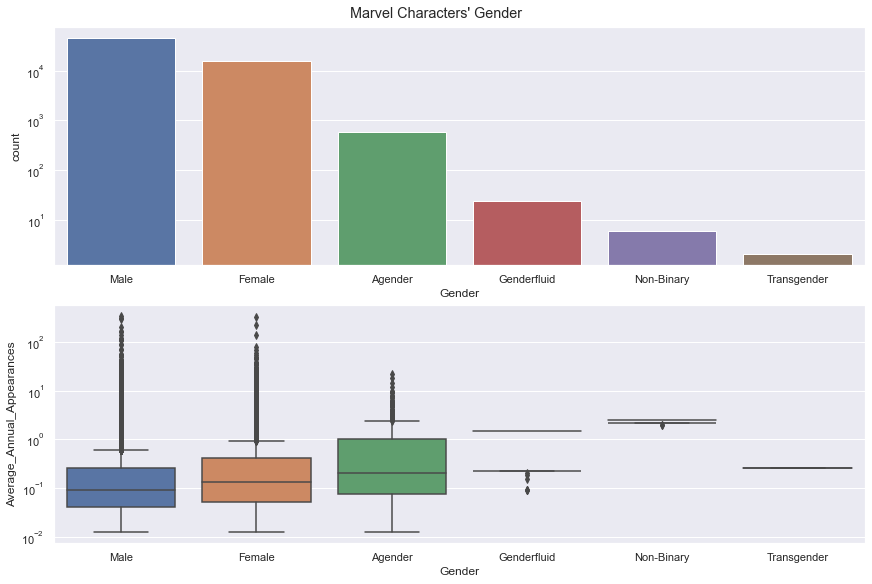

In [136]:
plot_bar_box('Gender')

As seen above, majority of Marvel characters are male or female, with the rest of the other categories at a lower order of magnitude as compared to the two.

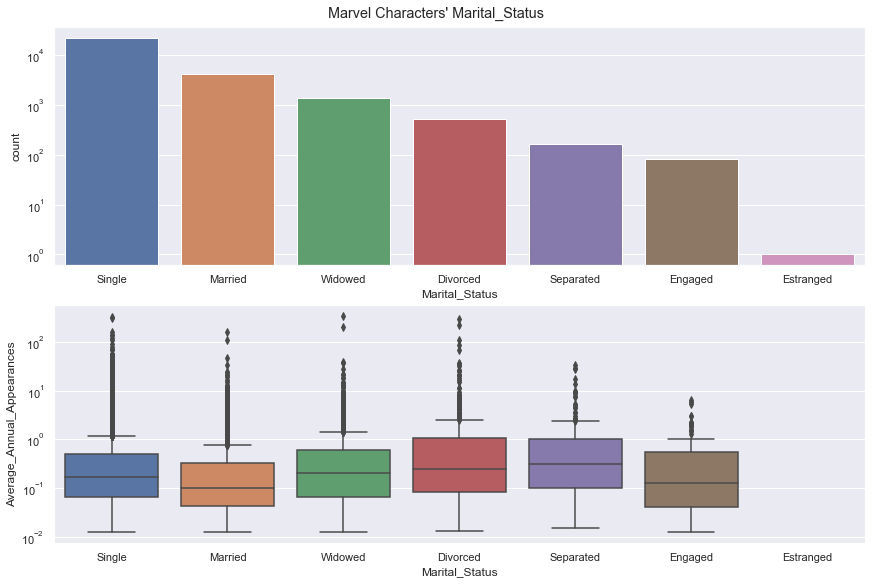

In [138]:
plot_bar_box('Marital_Status')

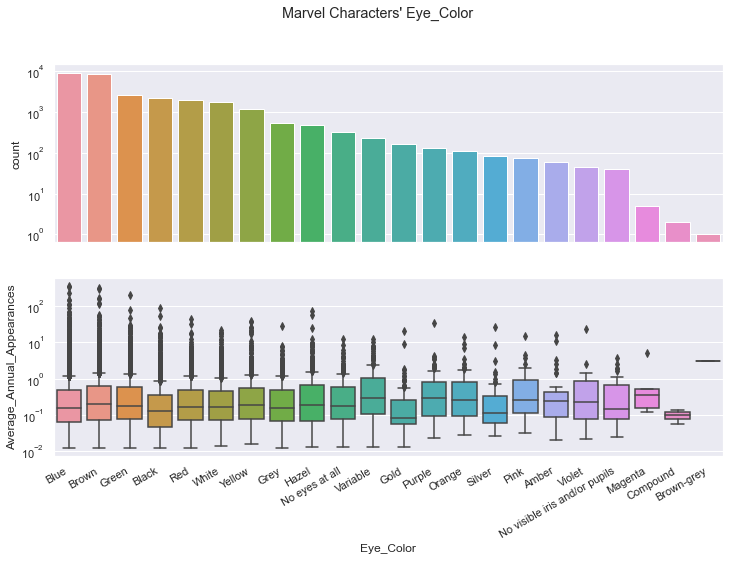

In [139]:
plot_bar_box('Eye_Color', True)

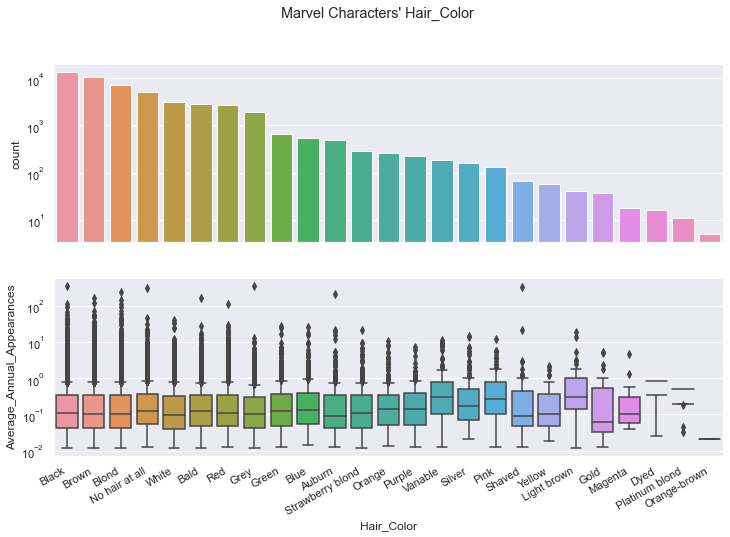

In [140]:
plot_bar_box('Hair_Color', True)

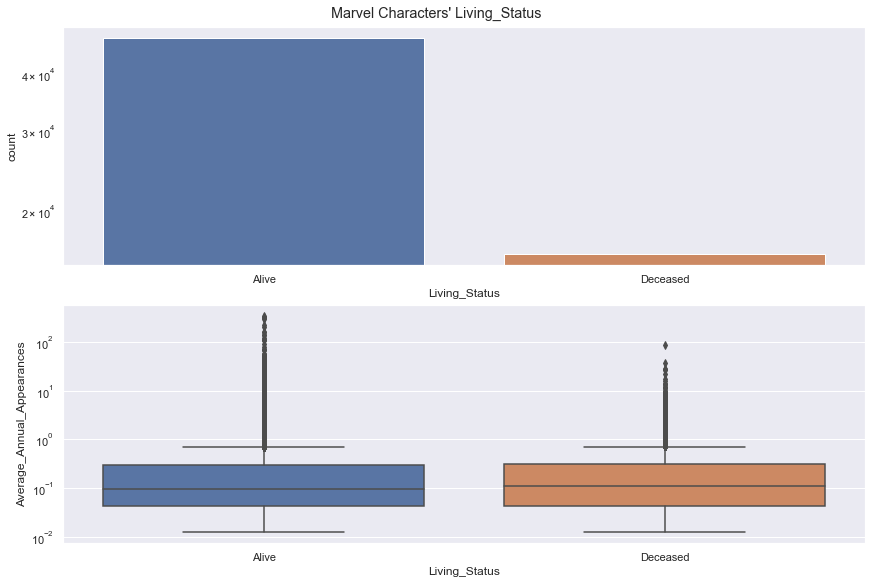

In [141]:
plot_bar_box('Living_Status')

As expected, majority of the characters are alive, but suprisingly, the median value and 75th percentile for the Average_Annual_Appearances of deceased characters are higher compared to that of living characters.

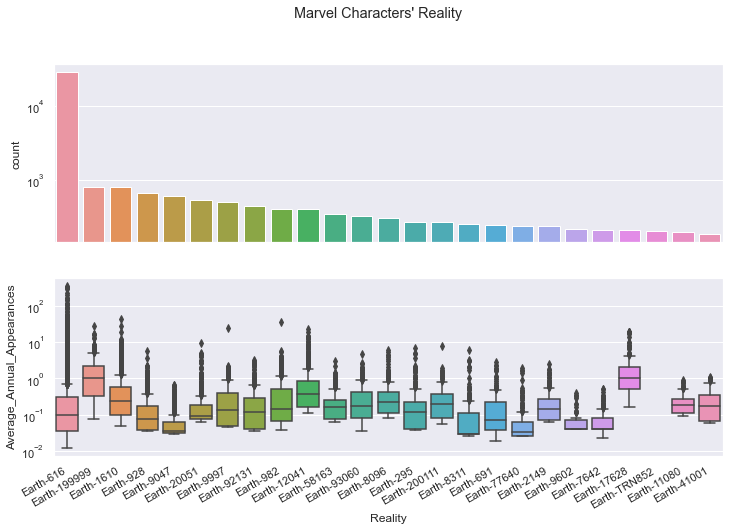

In [148]:
plot_bar_box('Reality', True)

As expected, Earth-616 characters dominate Marvel comics, as this reality is the mainstream reality of this comic franchise.

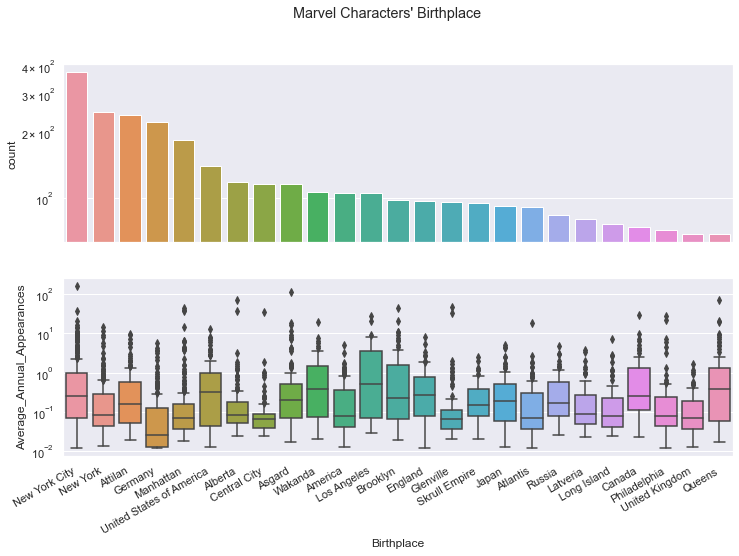

In [149]:
plot_bar_box('Birthplace', True)

As seen above, the Birthplace feature seems to be very inconsistent, as the hierarchies of the places (eg. Queens is in New York which is in United States which is in America) are quite evident. Hence, we decide to drop the Birthplace feature altogether.

In [162]:
df = df.drop('Birthplace', 1)
df.shape

(64064, 14)

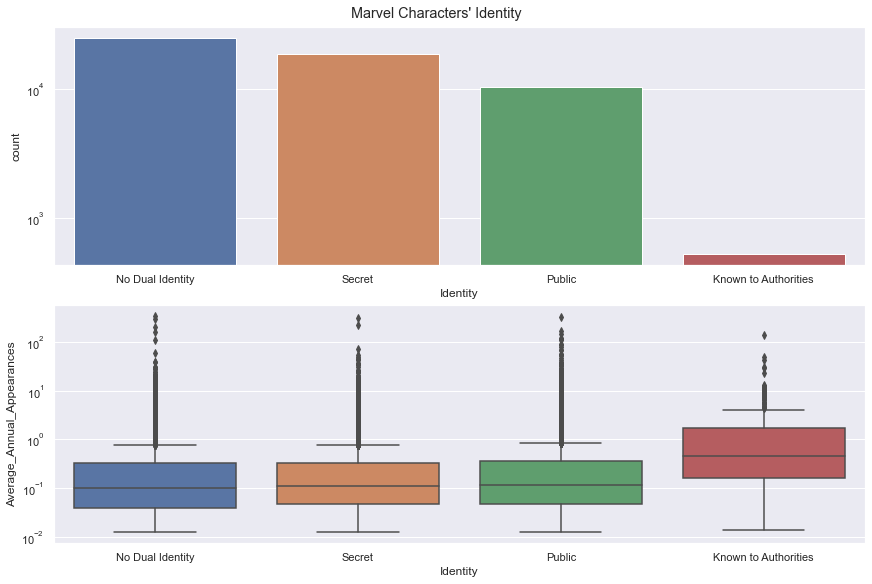

In [146]:
plot_bar_box('Identity')

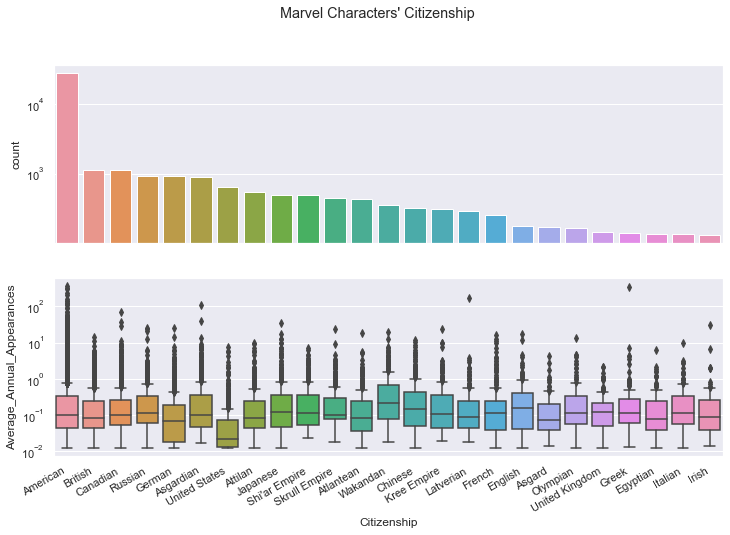

In [150]:
plot_bar_box('Citizenship', True)

Similar to the Birthplace feature, the Citizenship feature is also very inconsistent. We decide to drop this feature for now, although fixing both features is possible given more time and manpower.

In [163]:
df = df.drop('Citizenship', 1)
df.shape

(64064, 13)

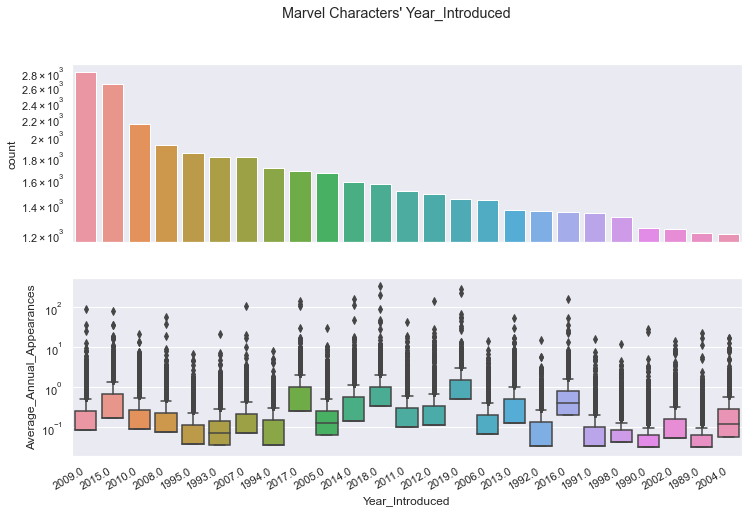

In [151]:
plot_bar_box('Year_Introduced', True)

We see above that the Year_Introduced column was formatted as a float. We change this to integer.

In [152]:
df['Year_Introduced'] = df['Year_Introduced'].astype('int')

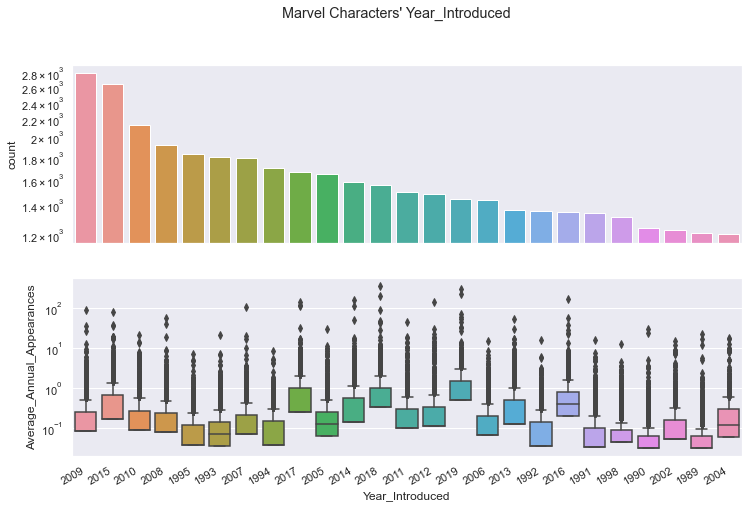

In [153]:
plot_bar_box('Year_Introduced', True)

We now proceed in plotting scatterplots for both Height and Weight with respect to Average_Annual_Appearances.

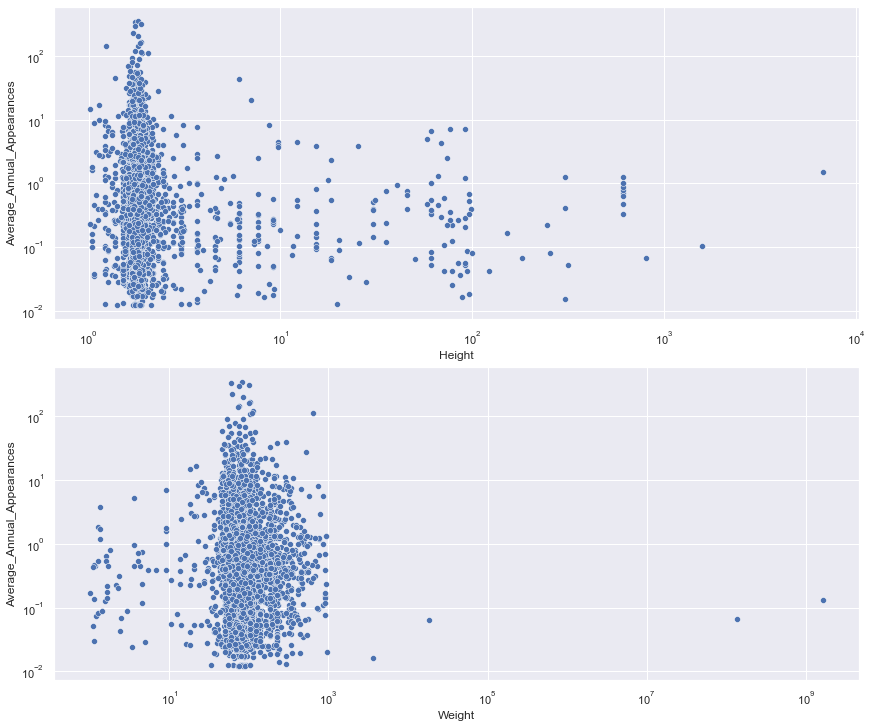

In [159]:
fig, ax = plt.subplots(nrows = 2, sharex = False, sharey = False, figsize = (12,10), constrained_layout = True)
height_scatter = sns.scatterplot(data = df, x = 'Height', y = 'Average_Annual_Appearances', ax = ax[0])
height_scatter.set_yscale("log")
height_scatter.set_xscale("log")
weight_scatter = sns.scatterplot(data = df, x = 'Weight', y = 'Average_Annual_Appearances', ax = ax[1])
weight_scatter.set_yscale("log")
weight_scatter.set_xscale("log")
plt.show()

As seen above, the height values are mostly in the 1-10 meter range, while the weight values are mostly in the 10-1000 kg range. Now that we are done with visualizing our dataset, we finally save our cleaned dataset to a new csv file.

In [174]:
df.shape

(64064, 13)

In [173]:
df.to_csv('characters_cleaned.csv')